<a href="https://colab.research.google.com/github/Sanmatijain22/SCT_ML_02/blob/main/ML_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers (1).csv


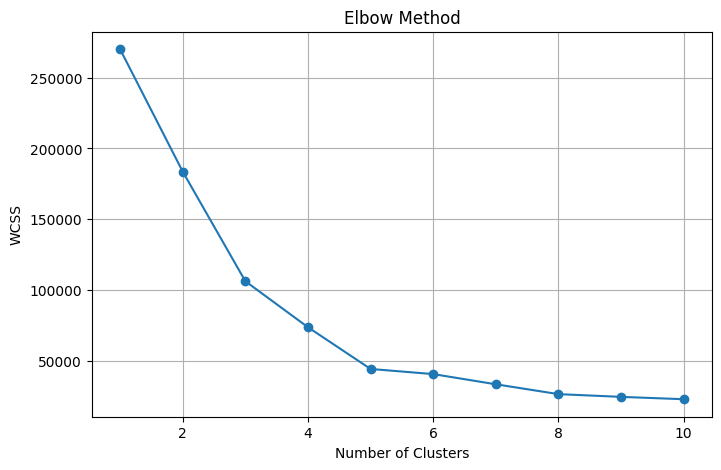

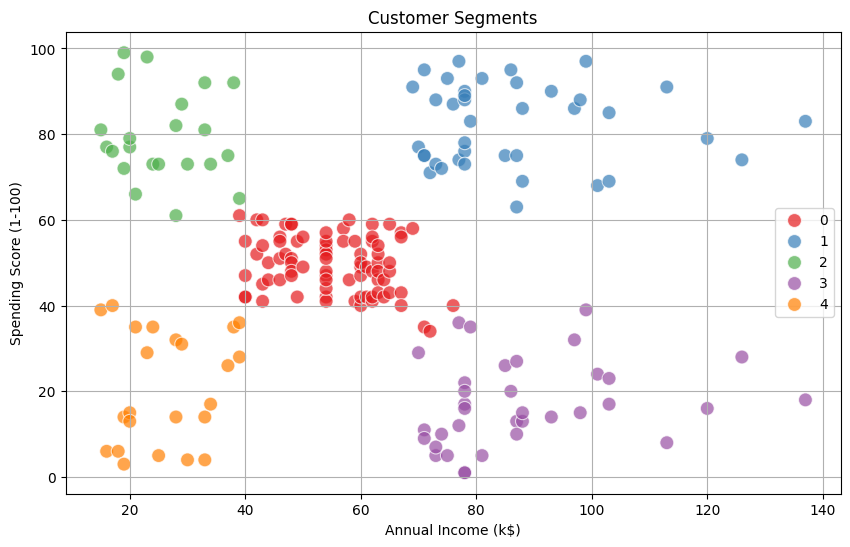

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
# If uploading manually in Colab
from google.colab import files
uploaded = files.upload()

# After uploading your CSV, use this:
df = pd.read_csv('Mall_Customers.csv')  # Replace with your file name

# Step 3: Preprocess Data
# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Step 4: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 5: Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 6: Apply KMeans with optimal clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster info to DataFrame
df['Cluster'] = clusters

# Step 7: Visualize the Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='Set1', data=df, s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
